## Numpy & Pandas


### Data Loading & Exploration

In [2]:
import torch
from scipy.io import loadmat
import torchvision.transforms as T
from PIL import Image

mnist_data = loadmat('mnist-original.mat')
images = mnist_data['data'].T
labels = mnist_data['label'][0]

print(images[:10])
print(labels[:10])


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Data Preprocessing

In [3]:
import numpy as np
# print(images.shape)
x = images.reshape(images.shape[0], -1)

if np.isnan(images).any():
    images = np.nan_to_num(images)

#Convert to PyTorch tensors
images = torch.from_numpy(images).float()
labels = torch.from_numpy(labels).long()

#normalize the pixel values to the range [0, 1]
images /= 255.0

# Matplotlib

### Data Visualization

[69430 61452 58442 57672 41377 23536 29700  3761  7734 24562]


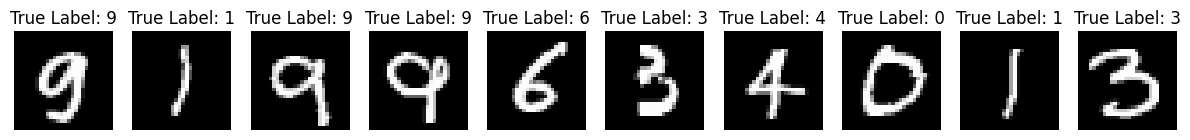

In [4]:
import matplotlib.pyplot as plt

#function to display a random sample of images with their labels
def display_images(images, labels, num_samples=10):
    indices = np.random.choice(len(images), num_samples, replace=False)
    print(indices)
    #Plotting the images
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i, index in enumerate(indices):
        axes[i].imshow(images[index].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'True Label: {labels[index].item()}')
        axes[i].axis('off')

    plt.show()

display_images(images.numpy(), labels.numpy())


[6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


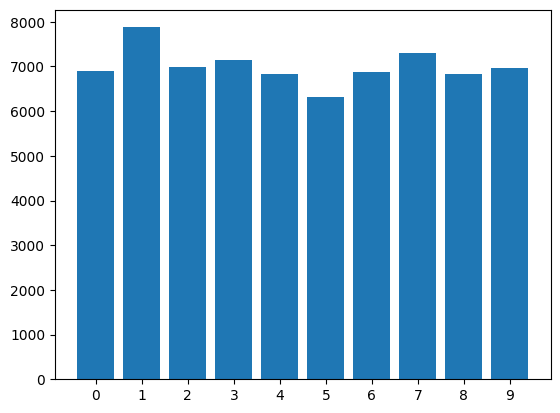

In [5]:
# plotting the label class (0-9) distribution
class_counts = np.bincount(labels)
print(class_counts)
plt.bar(np.arange(10), class_counts)
plt.xticks(np.arange(10))
plt.show()

### Image Preprocessing


In [6]:
#augmenting the images
import torch
from torchvision import transforms
from torchvision.transforms import functional as F
from scipy.io import loadmat

mnist_data = loadmat('mnist-original.mat')
images = mnist_data['data'].T
labels = mnist_data['label'][0]

images = torch.from_numpy(images).float()
labels = torch.from_numpy(labels).long()

images = images.reshape(images.shape[0], 28, 28)

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(degrees=90),
    transforms.ToTensor(),
])

augmented_images = torch.stack([transform(image) for image in images])

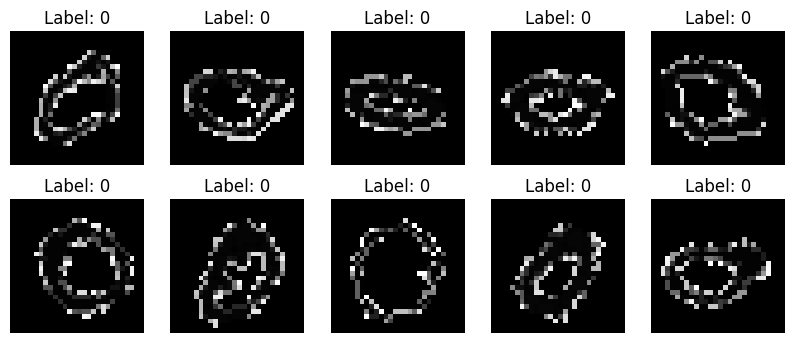

In [7]:
#displaying the augmented images
import random
indices = [el for el in range(100)]

fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, idx in enumerate(indices):
    if i < 10:
        axs[i // 5, i % 5].imshow(augmented_images[idx].permute(1, 2, 0), cmap='gray')
        axs[i // 5, i % 5].axis('off')
        axs[i // 5, i % 5].set_title(f"Label: {labels[idx].item()}")

plt.show()

In [5]:

from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
# Get images
image = img_to_array(load_img('woman.jpg'))
image = np.array(image, dtype=float)
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
# Finish model
model.compile(optimizer='rmsprop',loss='mse')
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=1000)
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result.png", lab2rgb(cur))
imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))
 

ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'